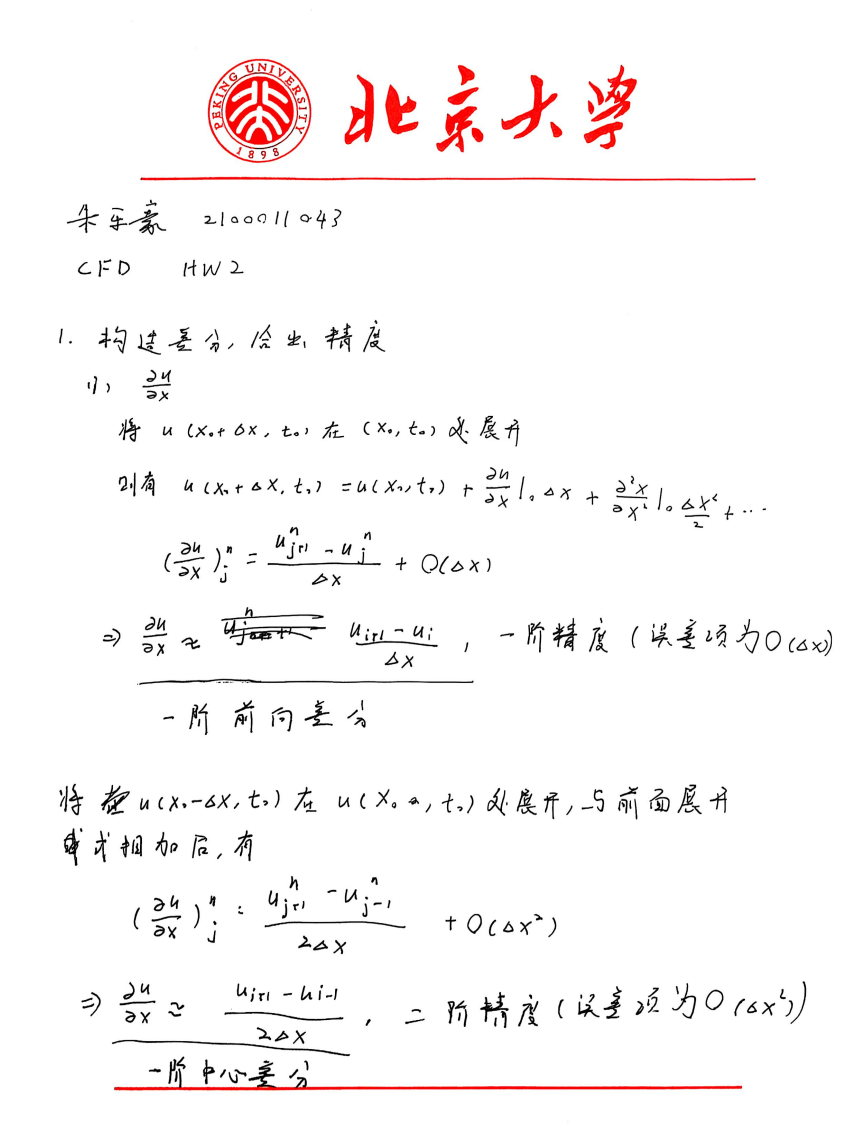

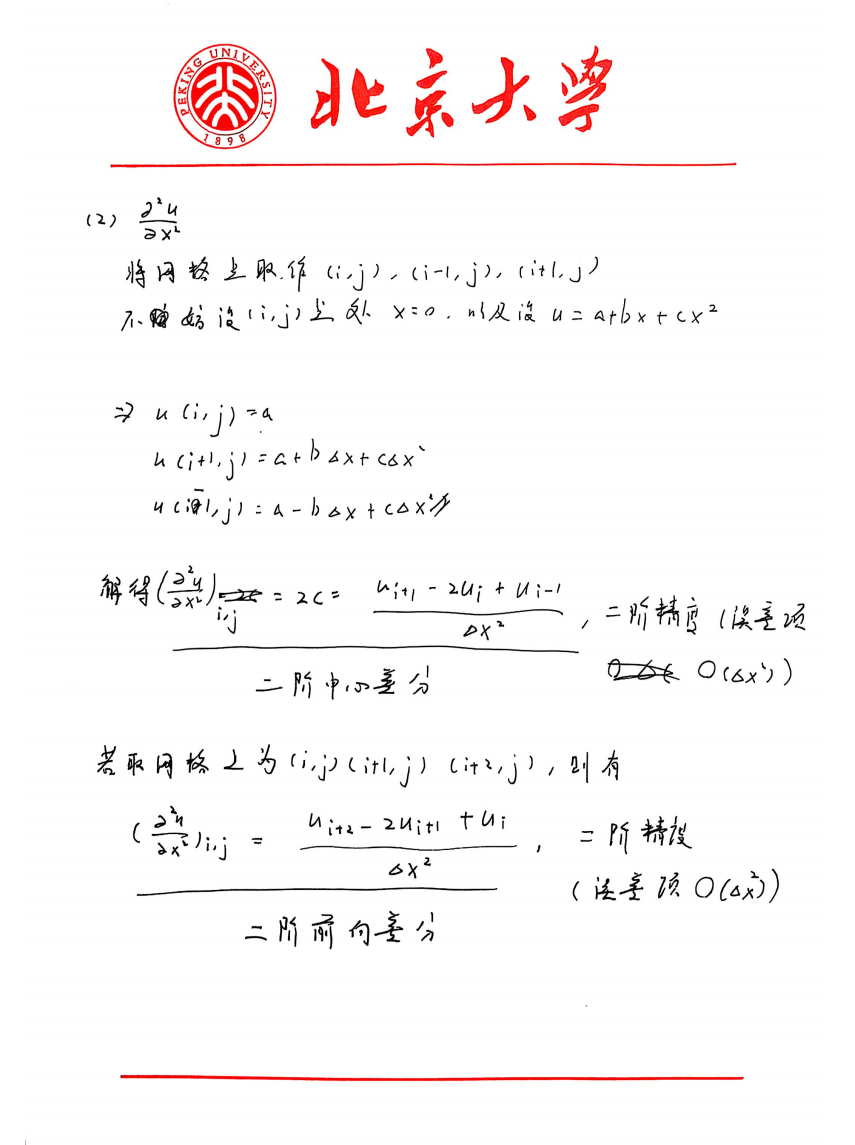

2. 数值验证格式的精度。

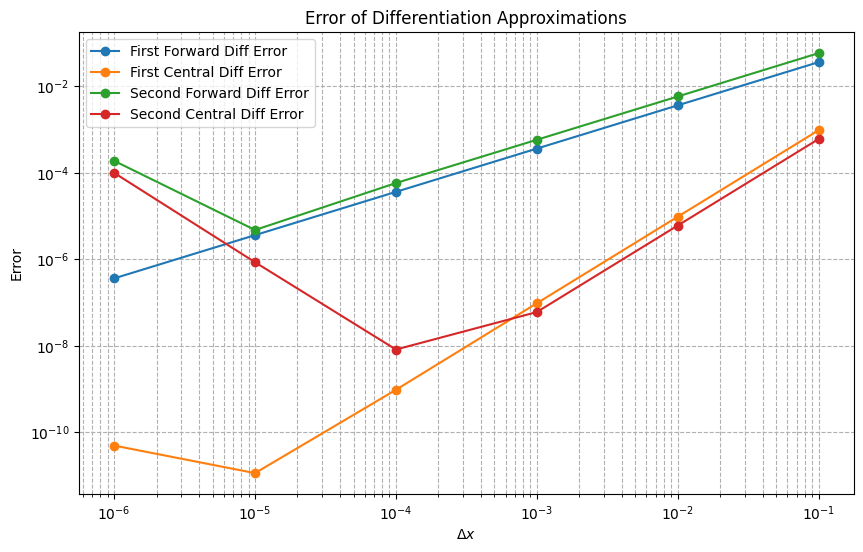

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 定义函数u及其导数
def u(x):
    return np.sin(x)

def u_prime(x):
    return np.cos(x)

def u_double_prime(x):
    return -np.sin(x)

# 定义差分近似函数
def first_forward_diff(u, x, dx):
    return (u(x + dx) - u(x)) / dx

def first_central_diff(u, x, dx):
    return (u(x + dx) - u(x - dx)) / (2 * dx)

def second_forward_diff(u, x, dx):
    return (u(x + 2 * dx) - 2 * u(x + dx) + u(x)) / dx**2   

def second_central_diff(u, x, dx):
    return (u(x + dx) - 2 * u(x) + u(x - dx)) / dx**2

# 验证精度
# 选择一组x值和dx值
x_values = [1, 2, 3, 4, 5]
dx_values = np.array([0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1])

# 计算差分近似和真实值
first_forward_errors = []
first_central_errors = []
second_forward_errors = []
second_central_errors = []

for dx in dx_values:
    # 对x_values取平均
    first_forward_error = 0
    first_central_error = 0
    second_forward_error = 0
    second_central_error = 0
    for x in x_values:
        first_forward_error += abs(first_forward_diff(u, x, dx) - u_prime(x))
        first_central_error += abs(first_central_diff(u, x, dx) - u_prime(x))
        second_forward_error += abs(second_forward_diff(u, x, dx) - u_double_prime(x))
        second_central_error += abs(second_central_diff(u, x, dx) - u_double_prime(x))
        
    first_forward_errors.append(first_forward_error / len(x_values))
    first_central_errors.append(first_central_error / len(x_values))
    second_forward_errors.append(second_forward_error / len(x_values))
    second_central_errors.append(second_central_error / len(x_values))
    
# 绘制误差图
plt.figure(figsize=(10, 6))
plt.loglog(dx_values, first_forward_errors, '-o', label='First Forward Diff Error')
plt.loglog(dx_values, first_central_errors, '-o', label='First Central Diff Error')
plt.loglog(dx_values, second_forward_errors, '-o', label='Second Forward Diff Error')
plt.loglog(dx_values, second_central_errors, '-o', label='Second Central Diff Error')
plt.xlabel('$\Delta x$')
plt.ylabel('Error')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.title('Error of Differentiation Approximations')
plt.show()

3. 舍入误差和截断误差的规律

舍入误差主要由计算机的浮点数表示引起，通常与使用的数据类型的精度有关（单精度或双精度）。

截断误差由数值方法本身的近似引起，与差分格式的阶数相关。

为了分析这些误差，先使用一个多项式函数（例如，u(x)=2x），避免截断误差;然后使用非多项式函数（例如，u(x)=sin(kx)）来同时观察截断误差和舍入误差。使用中心差分方法。

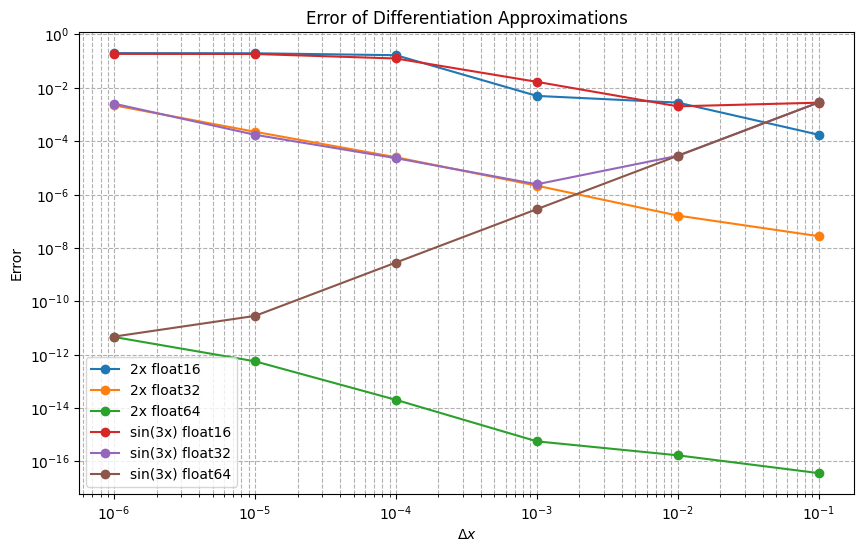

In [11]:
def u1(x):
    return 2 * x

def u1_prime(x):
    return 2

def u2(k, x):
    return np.sin(k * x)

def u2_prime(k, x):
    return k * np.cos(k * x)

k_list = [1, 2, 3, 4, 5]

def cal_error(func, func_prime, difference_scheme, dx, accuracy):
    x_values = np.linspace(0, 2*np.pi/8, 100, dtype=accuracy)
    u_prime_approx = difference_scheme(func, x_values, dx)
    u_prime_true = func_prime(x_values)
    error_mean = np.linalg.norm(u_prime_approx - u_prime_true) / len(x_values)
    return error_mean


# 1. 使用float16、float32、float64三种精度

dx_list = np.array([0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1])
errors_float16 = [[], [], [], [], [], []]
errors_float32 = [[], [], [], [], [], []]
errors_float64 = [[], [], [], [], [], []]

for dx in dx_list:
    # 计算u1的误差
    error_float16 = cal_error(u1, u1_prime, first_central_diff, dx, np.float16)
    error_float32 = cal_error(u1, u1_prime, first_central_diff, dx, np.float32)
    error_float64 = cal_error(u1, u1_prime, first_central_diff, dx, np.float64)
    errors_float16[0].append(error_float16)
    errors_float32[0].append(error_float32)
    errors_float64[0].append(error_float64)
    # 计算u2的误差
    for k in k_list:
        error_float16 = cal_error(lambda x: u2(k, x), lambda x: u2_prime(k, x), first_central_diff, dx, np.float16)
        error_float32 = cal_error(lambda x: u2(k, x), lambda x: u2_prime(k, x), first_central_diff, dx, np.float32)
        error_float64 = cal_error(lambda x: u2(k, x), lambda x: u2_prime(k, x), first_central_diff, dx, np.float64)
        errors_float16[k].append(error_float16)
        errors_float32[k].append(error_float32)
        errors_float64[k].append(error_float64)
        
# 绘制误差图（包括u1和u2）
plt.figure(figsize=(10, 6))
for k in range(6):
    if k in [1, 2, 4, 5]:
        continue
    if k == 0:
        label = '2x'
    else:
        label = f'sin({k}x)'
    plt.loglog(dx_list, errors_float16[k], '-o', label=f'{label} float16')
    plt.loglog(dx_list, errors_float32[k], '-o', label=f'{label} float32')
    plt.loglog(dx_list, errors_float64[k], '-o', label=f'{label} float64')
plt.xlabel('$\Delta x$')
plt.ylabel('Error')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.title('Error of Differentiation Approximations')
plt.show()

为了图像可读性，只显示k=3时的图像

发现：
1. 在float64下多项式函数误差极小，为1e-11量级。可见此时舍入误差极小。且验证了二阶以下多项式函数可以忽略截断误差。
2. 分析不同数值精度结果发现，数值精度越低，舍入误差越占主导。在使用float16和float32时误差相差不大，可见此时舍入误差为主导，截断误差不明显。

4. 单双精度的影响

单精度提供大约7位十进制的精度，而双精度提供大约15位十进制的精度。在进行精确的计算时，双精度能提供更高的精确度，但会消耗更多的内存和可能增加计算时间。
在数值分析中，更高的精度有助于减少舍入误差，无法减少截断误差。

使用单精度浮点数进行计算时，较小的dx值更容易导致舍入误差，因为单精度浮点数的表示范围和精度较低。
使用双精度浮点数可以减少舍入误差，尤其是在处理需要高度精确度或涉及非常小或非常大数值的计算时。

附录：AI声明和COMMIT截图

AI使用了github copilot。用于同类型代码外推，如将float16的代码外推到float32和float64。

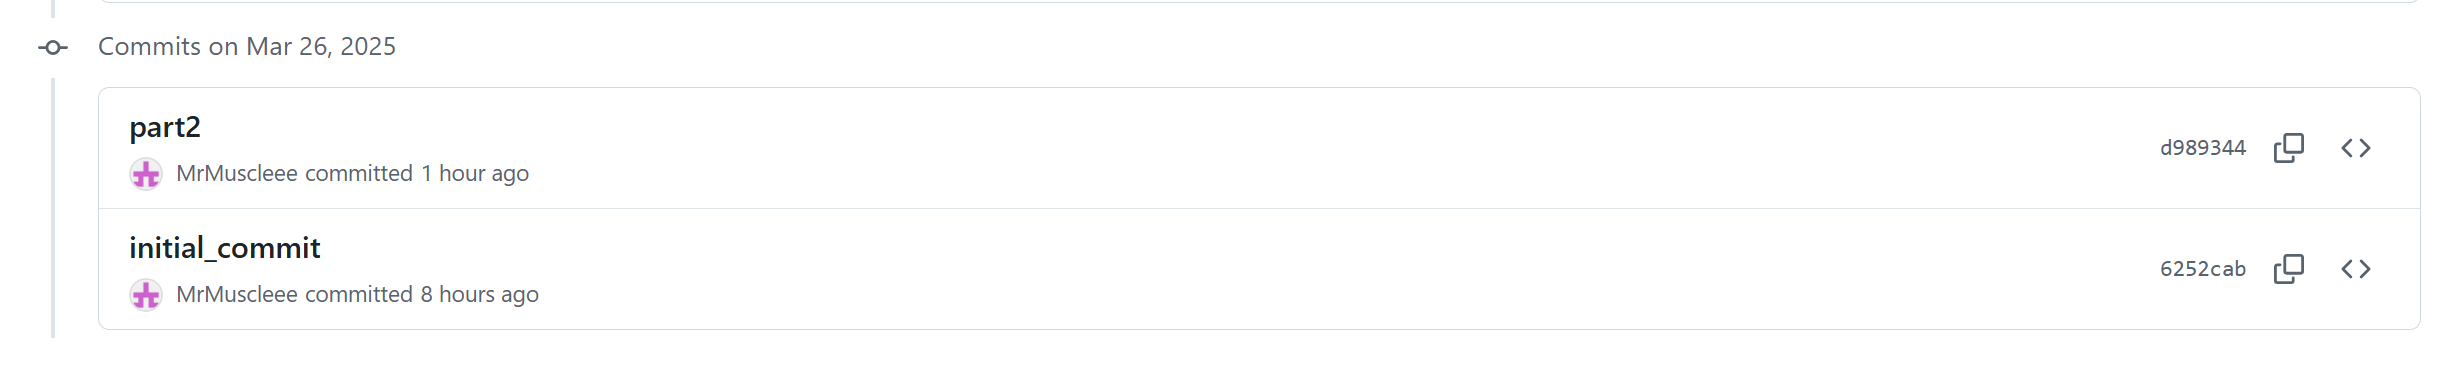